<a href="https://colab.research.google.com/github/DS3001/group19/blob/main/project_2/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleansing Training & Testing Data

In [18]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
df_test = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/testing_data.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/training_data.csv')

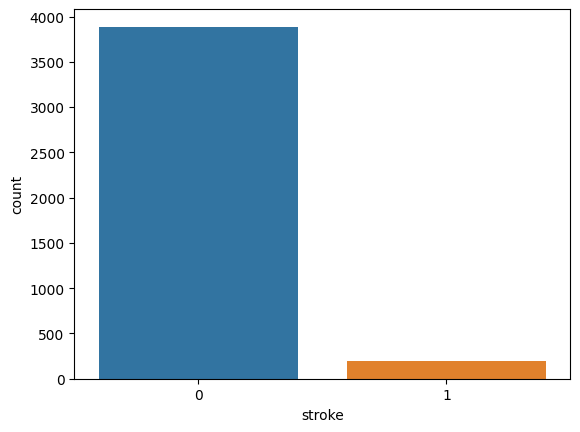

0    3888
1     199
Name: stroke, dtype: int64


In [19]:
sns.countplot(x='stroke', data=df_train)
plt.show()
stroke_counts = df_train['stroke'].value_counts()
print(stroke_counts)

In [20]:
df_train.isnull().sum() #  bmi column has a total of 42 missing values

Unnamed: 0             0
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64

In [21]:
df_test.isnull().sum() #  bmi column has a total of 159 missing values

Unnamed: 0            0
id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64

In [22]:
# To avoid introducing bias, I am going to drop the NA values from the training and testing data sets instead of imputing averages for the bmi column
df_train.dropna(subset=['bmi'], inplace=True)
df_test.dropna(subset=['bmi'], inplace=True)
df_train.isnull().sum() # No more NA Values

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
df_test.isnull().sum() # No more NA values

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [24]:
# Drop 'Unnamed:0' and 'id' columns because they are not useful in our study
list=['Unnamed: 0', 'id']
df_train=df_train.drop(list,axis=1)
df_test=df_test.drop(list,axis=1)

In [25]:
unknown_count_train = (df_train['smoking_status'] == 'Unknown').sum()
print(unknown_count_train)
# Do we want to drop all 'Unknown' rows?
# There are only supposed to be 3 levels to this variable

1195


In [26]:
unknown_count_test = (df_test['smoking_status'] == 'Unknown').sum()
print(unknown_count_test)

288


In [27]:
# These are a lot of Unknown values, and it wouldn't make sense to drop all the rows.
# I think in this case, we can include 'Unknown' as a 4th category under
# 'Smoking Status'

print(df_train)


# This is a view of our cleansed dataset

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  36.0             0              0          Yes       Govt_job   
1     Female  45.0             0              0          Yes       Govt_job   
2       Male  58.0             0              0           No  Self-employed   
3     Female  61.0             0              0          Yes  Self-employed   
4     Female  78.0             0              0           No        Private   
...      ...   ...           ...            ...          ...            ...   
4082  Female  53.0             0              0          Yes       Govt_job   
4083    Male  76.0             1              0          Yes  Self-employed   
4084  Female  81.0             0              0          Yes        Private   
4085  Female  55.0             1              1          Yes        Private   
4086    Male  47.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

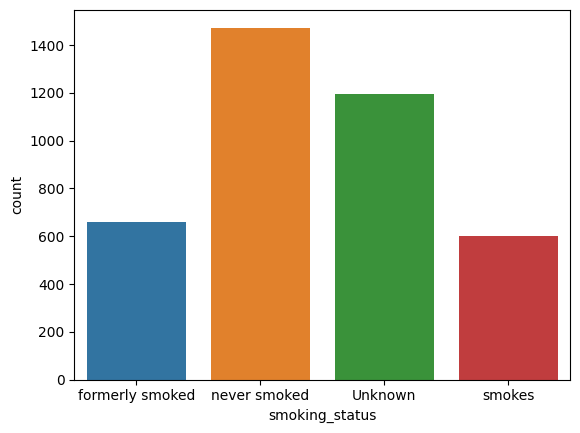

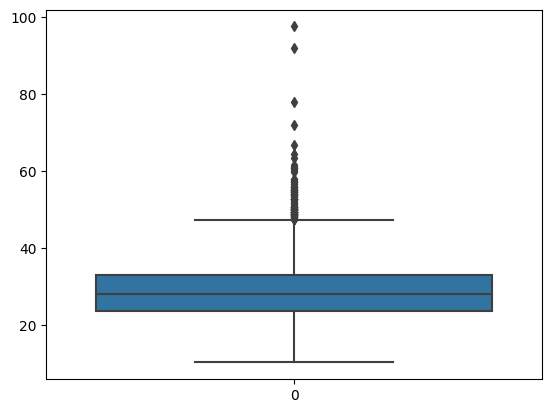

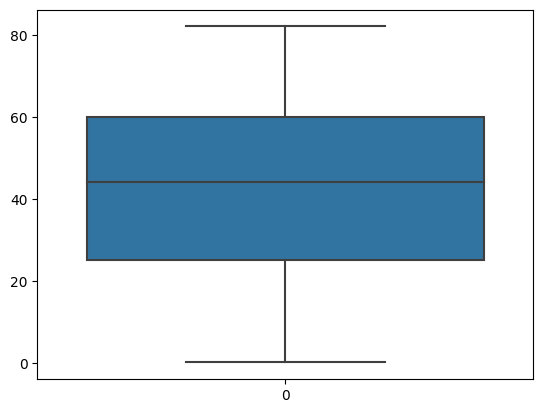

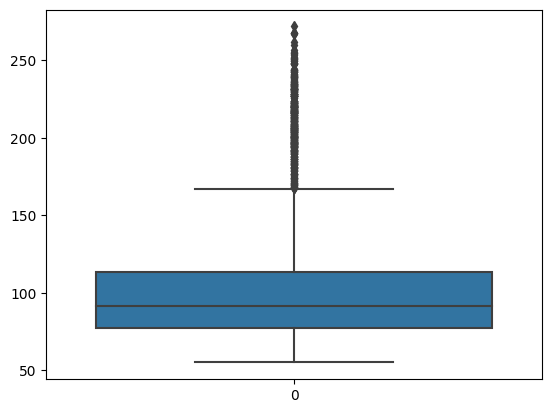

In [28]:
sns.countplot(x='smoking_status', data=df_train)
plt.show()

sns.boxplot(df_train['bmi'])
plt.show()
sns.boxplot(df_train['age'])
plt.show()

sns.boxplot(df_train['avg_glucose_level'])
plt.show()

In [29]:
#Windsorizing to BMI and avg_glucose_level to handle of outliers

def windsorize(x):
    pct25, pct75 = np.percentile(x, [25, 75])
    iqr = pct75 - pct25
    lower_whisker = pct25 - iqr * 1.5
    upper_whisker = pct75 + iqr * 1.5
    x_windsor = x.copy()
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return x_windsor

numeric = ["age", "bmi", "avg_glucose_level"]
for i in numeric:
  df_train[i] = windsorize(df_train[i])




In [30]:
# Creating dummy variables
categorical_columns = ['smoking_status', 'Residence_type', 'gender', 'ever_married', 'work_type']
df_train = pd.get_dummies(df_train, columns=categorical_columns, drop_first=True)

# Check the first few rows of the updated DataFrame
print(df_train.head())


    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  36.0             0              0           65.87000  32.2       0   
1  45.0             0              0           68.66000  25.3       0   
2  58.0             0              0          167.40625  30.7       0   
3  61.0             0              0           69.88000  27.1       0   
4  78.0             0              0          103.86000  30.6       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            0   
3                               0                            1   
4                               0                            0   

   smoking_status_smokes  Residence_type_Urban  gender_Male  gender_Other  \
0                      0                     1            1             0   
1         

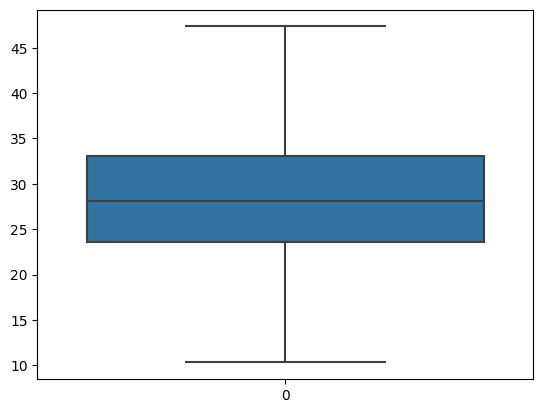

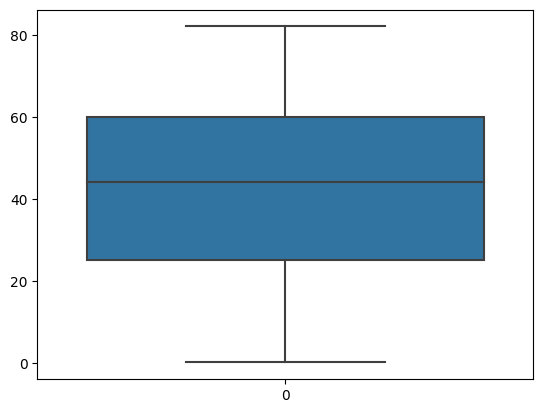

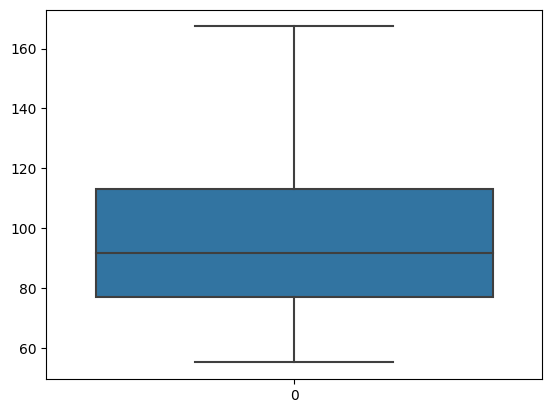

In [31]:

#Checking
sns.boxplot(df_train['bmi'])
plt.show()
sns.boxplot(df_train['age'])
plt.show()
sns.boxplot(df_train['avg_glucose_level'])
plt.show()

In [32]:
X = df_train.drop('stroke', axis=1)
y = df_train['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Because the target variable is binary, using a Decision Tree Regressor is not not be appropriate as proven below with the negative R2 and RMSE scores instead a classification algorithm should be used.
depths = range(1, 20)
r2_scores = []
rmse_scores = []

for depth in depths:

    # Construct an appropriate matrix of regressors/features, and fit a tree to the data.
    model_tree = tree.DecisionTreeRegressor(max_depth=depth)
    cart = model_tree.fit(X_train, y_train)



    # Predict and evaluate the model compute the  𝑅2and RMSE on the test set of a variety of depths
    y_pred_tree = model_tree.predict(X_test)
    r2_tree = r2_score(y_test, y_pred_tree)
    rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
    r2_scores.append(r2_tree)
    rmse_scores.append(rmse_tree)


for i, depth in enumerate(depths):
    print(f"Depth: {depth}, R^2: {r2_scores[i]}, RMSE: {rmse_scores[i]}")





Depth: 1, R^2: 0.06465920723116492, RMSE: 0.2074459636215556
Depth: 2, R^2: 0.0860818994607434, RMSE: 0.20505657093774737
Depth: 3, R^2: 0.046094234183011285, RMSE: 0.20949457838822969
Depth: 4, R^2: 0.028231614242632985, RMSE: 0.21144695448596135
Depth: 5, R^2: -0.034338788893923944, RMSE: 0.21814811114791074
Depth: 6, R^2: -0.04981886150953718, RMSE: 0.21977446768049178
Depth: 7, R^2: -0.18895706603096718, RMSE: 0.23388541344198915
Depth: 8, R^2: -0.3396273768644664, RMSE: 0.24826303387447485
Depth: 9, R^2: -0.4058353295117394, RMSE: 0.25432396033949706
Depth: 10, R^2: -0.5521571472495446, RMSE: 0.267231651552588
Depth: 11, R^2: -0.612991132299999, RMSE: 0.2724181511260794
Depth: 12, R^2: -0.6456679444261391, RMSE: 0.2751637098061771
Depth: 13, R^2: -0.6256699648633459, RMSE: 0.27348671970499816
Depth: 14, R^2: -0.7198151856436361, RMSE: 0.2812943057945745
Depth: 15, R^2: -0.798079212999433, RMSE: 0.2876235626476803
Depth: 16, R^2: -0.7976167440660482, RMSE: 0.28758657164210677
Depth

[Text(0.5, 0.875, 'age <= 67.5\ngini = 0.081\nsamples = 3142\nvalue = [3009, 133]\nclass = 1'),
 Text(0.25, 0.625, 'age <= 50.5\ngini = 0.04\nsamples = 2635\nvalue = [2581, 54]\nclass = 1'),
 Text(0.125, 0.375, 'age <= 38.5\ngini = 0.012\nsamples = 1856\nvalue = [1845, 11]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.003\nsamples = 1313\nvalue = [1311, 2]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 543\nvalue = [534, 9]\nclass = 1'),
 Text(0.375, 0.375, 'avg_glucose_level <= 103.4\ngini = 0.104\nsamples = 779\nvalue = [736, 43]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.061\nsamples = 473\nvalue = [458, 15]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.166\nsamples = 306\nvalue = [278, 28]\nclass = 1'),
 Text(0.75, 0.625, 'avg_glucose_level <= 126.84\ngini = 0.263\nsamples = 507\nvalue = [428, 79]\nclass = 1'),
 Text(0.625, 0.375, 'ever_married_Yes <= 0.5\ngini = 0.215\nsamples = 343\nvalue = [301, 42]\nclass = 1'),
 Text(0.5625, 0.125, 'gini = 0.382\nsamples = 35\nval

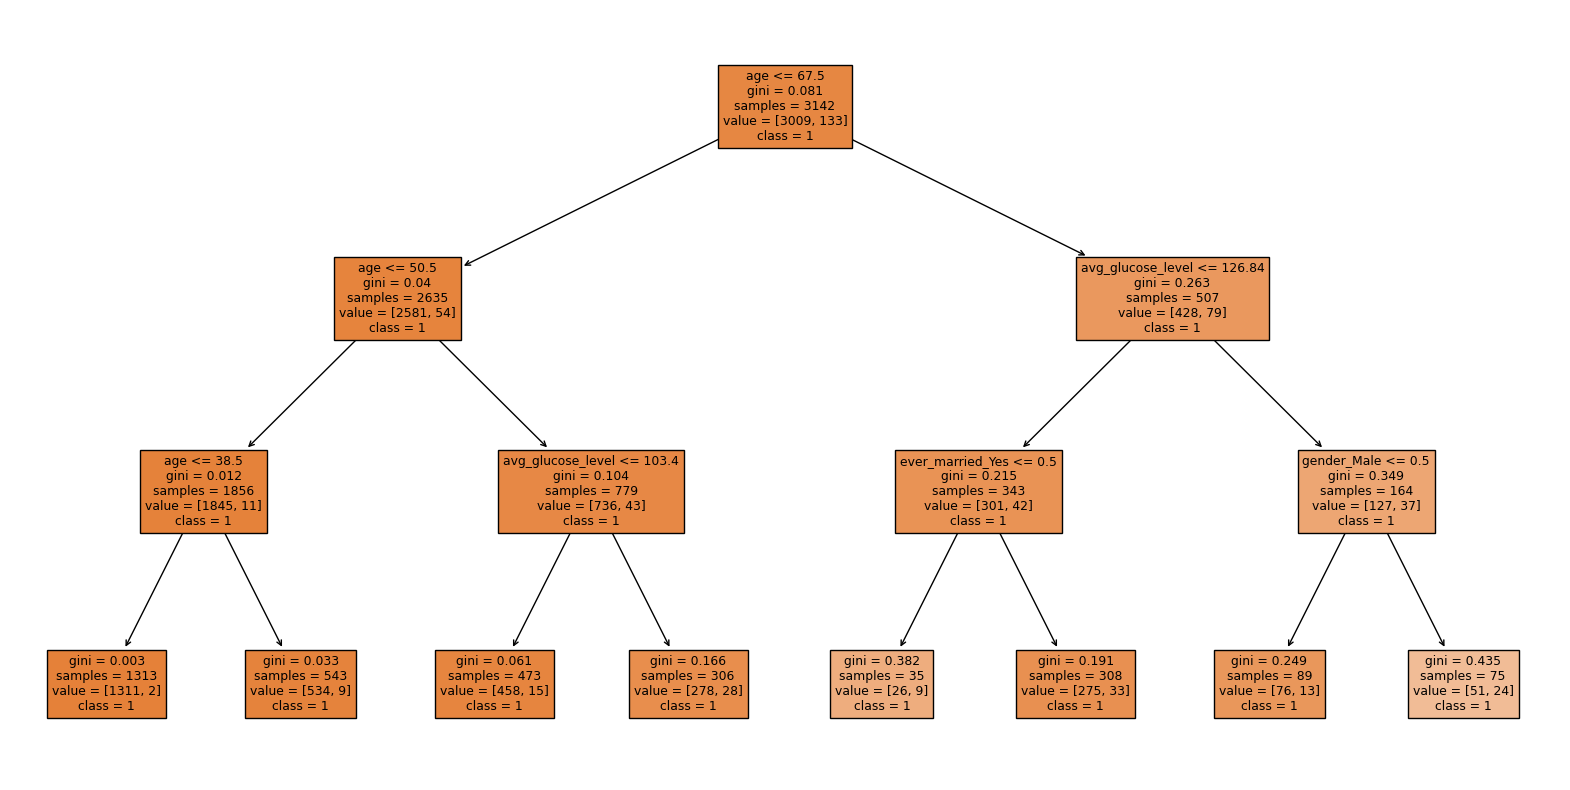

In [35]:
classifier = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
classifier.fit(X_train, y_train)

# Predictions from the classification tree
y_pred=classifier.predict(X_test)

# Visualize results:
plt.figure(figsize=(20,10))
tree.plot_tree(classifier ,filled=True,feature_names=X_train.columns, class_names=["1","2"])

In [37]:
# Compute confusion matrix
tab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
acc = (tab.iloc[0, 0] + tab.get(1, {}).get(1, 0)) / tab.to_numpy().sum()
print(acc)
print(tab)
accuracy_method_1 = tab.iloc[0, 0] / tab.iloc[0].sum() if 0 in tab else 0
accuracy_method_2 = tab.get(1, {}).get(1, 0) / tab.iloc[1].sum() if 1 in tab else 0


0.9516539440203562
Predicted    0
Actual        
0          748
1           38


If an individual's age is less than or equal to 70.5 years and their average glucose level is less than or equal to 64.575, and they do not have heart disease, then they are most likely to be classified as class 1.
An individual with a bmi less than or equal to 24.9, regardless of age, would also be classified as class 1.
The tree suggests that age is the most significant feature, followed by average glucose level, heart disease, and bmi.
The accuracy reported below the tree indicates that the Decision Tree Classifier was able to correctly predict the absence of stroke (class 0) in 188 cases out of 197, but it did not correctly predict any instances of stroke (class 1), as indicated by the 7 false negatives and 0 true positives in the confusion matrix. The accuracy is high primarily because of a large number of true negatives (correctly predicted no stroke cases), which can be misleading if the dataset is imbalanced with many more no stroke cases than stroke cases.

LINEAR REGRESSION